# Cutout + Baseline

## Purpose
Observe the effects of the data augmentation technique **Cutout**, as introduced by Devries and Taylor (2017), on the model's performance and generalization. A regularization technique which involves masking out some of the original images with a square of predefined dimensions.

In [1]:
import os
import sys

current_dir = os.getcwd()
package_path = os.path.abspath(os.path.join(current_dir, '..'))

if package_path not in sys.path:
    sys.path.insert(0, package_path)

In [2]:
import torch
from PIL import Image
import matplotlib.pyplot as plt

from config.paths import PathConfig # Path config

from src.model import MiniCNN, ConvBlock, FCBlock
from src.train import trainModel
from src.data import CustomDataset, load_cifar_10_data, check_data_loading, Loader, class_to_idx
from src.visualizations import plotFmaps_and_activationHist, plotCurves
from src.utils import unpickle, loadWeights, readJson, genError, saveHistory, evalModel

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [4]:
paths = PathConfig("regularization-ml", "regularization-data")
PROJECT_DIR = paths.project
DATA_DIR = paths.data
BASE_DIR = paths.root

## Dataset
Stays the same as with baseline. However we append the cutout augmentation technique.

In [ ]:
""" If using Colab, uncomment this
# Copy once from Drive
!cp $DATA_DIR/cifar-10-python.tar.gz /content/

# Extract locally
!mkdir /content/dataset/
!tar -xzf /content/cifar-10-python.tar.gz -C /content/dataset/
"""

In [ ]:
""" If running on local, uncomment this
!mkdir $DATA_DIR/dataset/
!tar -xzf $DATA_DIR/cifar-10-python.tar.gz -C $DATA_DIR/dataset/
"""

In [6]:
LOCAL_DATA = f"{DATA_DIR}/dataset" # path to cifar-10 dataset
train_data, train_labels, val_data, val_labels, test_data, test_labels = load_cifar_10_data(LOCAL_DATA)

## Model Definition + Training Setup
Both stay the same, the default used for baseline

In [7]:
# Defining the layers for the baseline model
base_conv_layers = [
    ConvBlock(3, 64, pool=False),
    ConvBlock(64, 64),
    ConvBlock(64, 128, pool=False),
    ConvBlock(128, 128)
]

base_fc_layers = [
    FCBlock(128, 64),
    torch.nn.Linear(64, 10)
]

baseline_model = MiniCNN(base_conv_layers, base_fc_layers)

## Cutout 8x8
We predefine a cutout class in our loader function, we set the cutout size to an 8x8 block or mask.

In [8]:
train_loader, val_loader, test_loader = Loader(train_data, train_labels, val_data,
                                               val_labels, test_data, test_labels, cutout=True, cutout_size=8)

Starting Data Loading...
⚠️  CUDA not available, using CPU
📁 Loading datasets...
✅ Datasets loaded successfully
Training samples: 40000
Validation samples: 10000
Batch size: 64
🔍 Testing data loading...
✅ Train batch shape: torch.Size([64, 3, 32, 32]), Labels: torch.Size([64])
   Input range: [-1.989, 2.126]
   Label range: [0, 9]
✅ Val batch shape: torch.Size([64, 3, 32, 32]), Labels: torch.Size([64])


In [ ]:
"""
history_cutout8 = {"train_loss": [], "val_loss": [], "train_acc": [], "val_acc": []}
model_type = "cutout8"
path = f"{DATA_DIR}/weights"
cutout8_model = trainModel(baseline_model, history_cutout8, train_loader, val_loader, model_type, path)
"""

In [ ]:
"""
history_path = f"../logs/cutout8.json"
saveHistory(history_cutout8, history_path) # Saves the training metadata to a json file
"""

The model trained for max epochs, early stopping was not triggered.

In [17]:
visuals8 = f"../visualizations/cutout8"
weights_path = f"{DATA_DIR}/weights/cutout8.pth"
cutout8 = loadWeights(baseline_model, weights_path)

In [ ]:
cutout8_json = f"../logs/cutout8.json"
cutout8_data = readJson(cutout8_json)

### Feature map plots
We plot the feature maps for the cutout 8x8 model to see if it has any effect on spatial representation in the Convnet, nothing particularly interesting was observed, but it's pretty so we will keep it nevertheless.

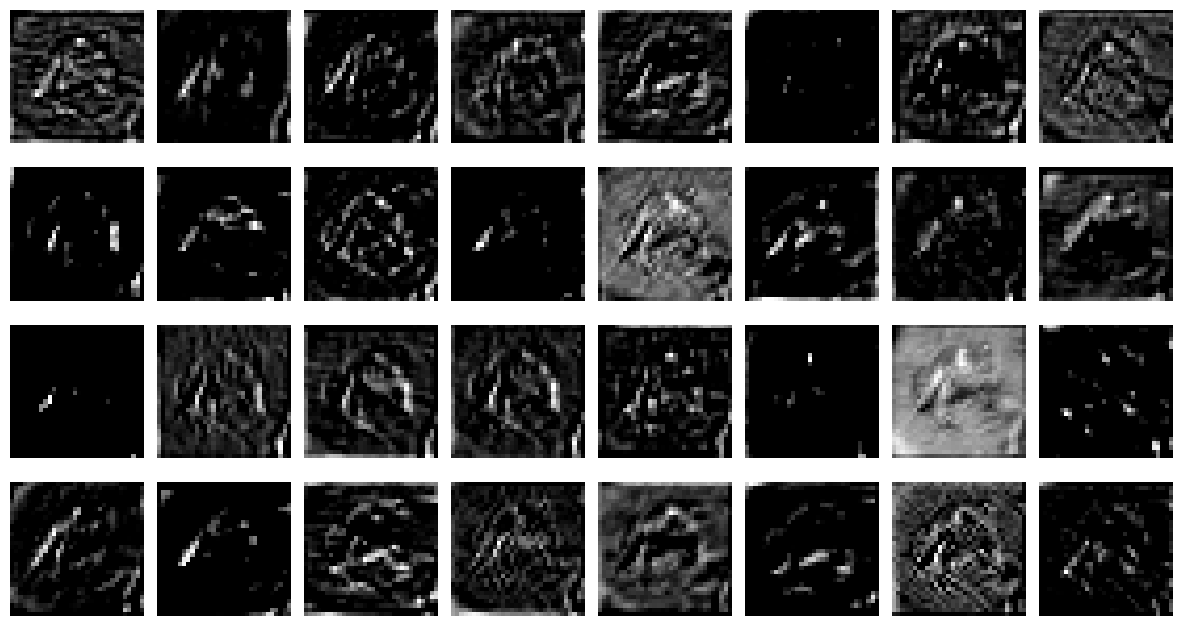

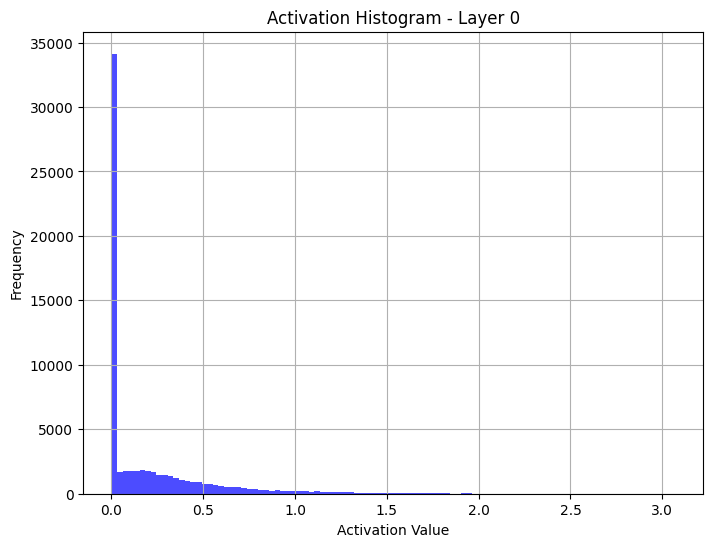

In [ ]:
plotFmaps_and_activationHist(cutout8, visuals8, val_loader)

Accuracy: 0.8408
              precision    recall  f1-score   support

           0     0.8530    0.8590    0.8560      1000
           1     0.9136    0.9300    0.9217      1000
           2     0.7613    0.7780    0.7695      1000
           3     0.7486    0.6880    0.7170      1000
           4     0.7804    0.8350    0.8068      1000
           5     0.7733    0.7710    0.7722      1000
           6     0.8653    0.8740    0.8697      1000
           7     0.8906    0.8470    0.8683      1000
           8     0.9173    0.9090    0.9131      1000
           9     0.9034    0.9170    0.9102      1000

    accuracy                         0.8408     10000
   macro avg     0.8407    0.8408    0.8404     10000
weighted avg     0.8407    0.8408    0.8404     10000

[INFO] Register count_convNd() for <class 'torch.nn.modules.conv.Conv2d'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.activation.ReLU'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.container.Sequenti

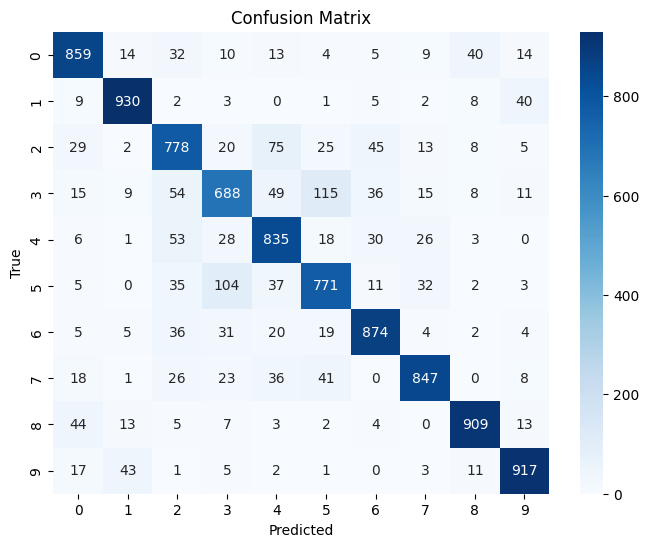

In [21]:
evalModel(cutout8, visuals8, test_loader)

---
---

## Cutout 16x16

Cutout will be adjusted to a 16x16 randomly placed block in the training images. This is of interest, we wish to see how much of a negative impact this would have on training since Cifar-10 images are 32x32 without any processing.

In [23]:
train_loader, val_loader, test_loader = Loader(train_data, train_labels, val_data, val_labels, test_data, test_labels, cutout=True, cutout_size=16)

Starting Data Loading...
⚠️  CUDA not available, using CPU
📁 Loading datasets...
✅ Datasets loaded successfully
Training samples: 40000
Validation samples: 10000
Batch size: 64
🔍 Testing data loading...
✅ Train batch shape: torch.Size([64, 3, 32, 32]), Labels: torch.Size([64])
   Input range: [-1.989, 2.126]
   Label range: [0, 9]
✅ Val batch shape: torch.Size([64, 3, 32, 32]), Labels: torch.Size([64])


In [ ]:
"""
history_cutout16 = {"train_loss": [], "val_loss": [], "train_acc": [], "val_acc": []}
model_type = "cutout16"
path = f"{DATA_DIR}/weights"
cutout16_model = trainModel(baseline_model, history_cutout16, train_loader, val_loader, model_type, path)
"""

In [ ]:
"""
history_path = f"../logs/cutout16.json"
saveHistory(history_cutout16, history_path) # Saves the training metadata to a json file
"""

Model trained for max epochs as well, early stopping was not triggered.

In [24]:
visuals16 = f"../visualizations/cutout16"
weights_path = f"{DATA_DIR}/weights/cutout16.pth"
cutout16 = loadWeights(baseline_model, weights_path)

In [ ]:
cutout16_json = f"../logs/cutout16.json"
cutout16_data = readJson(cutout16_json)

### Loss and Accuracy Plots
We observe the same strange plot observed in the convolutional layer experiment when p = 0.5, an effect of strong regularization.

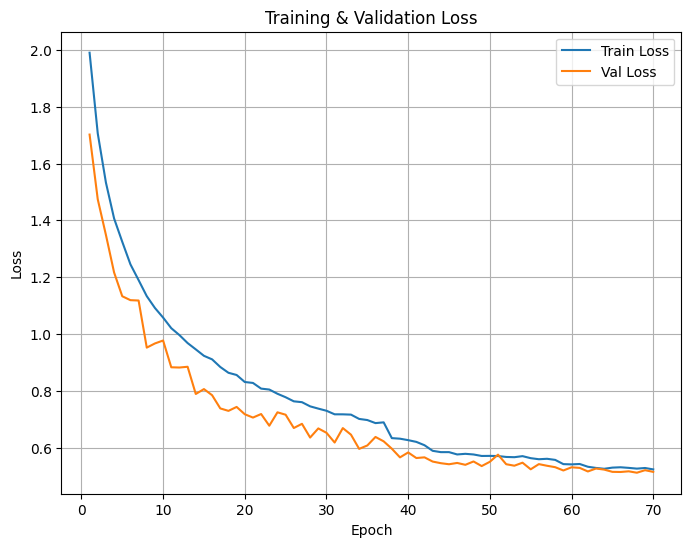

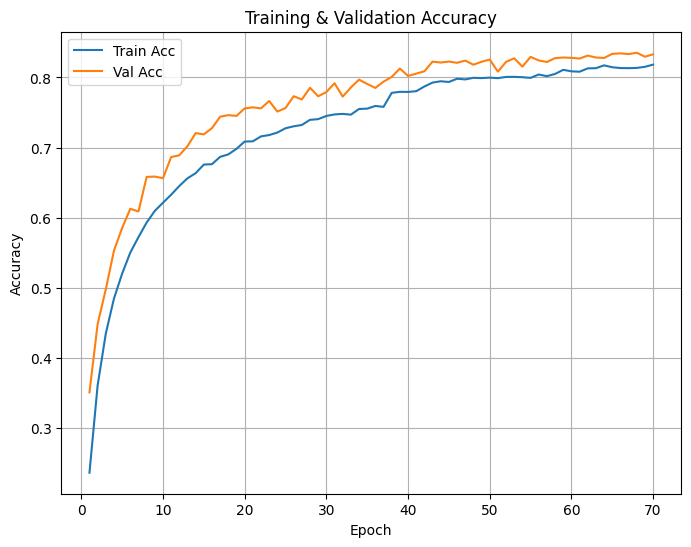

In [28]:
train_losses_cut16 = cutout16_data["train_loss"]
val_losses_cut16 = cutout16_data["val_loss"]
train_accs_cut16 = cutout16_data["train_acc"]
val_accs_cut16 = cutout16_data["val_acc"]
plotCurves(train_losses_cut16, val_losses_cut16, train_accs_cut16, val_accs_cut16, visuals16)

### Generalization Gap
Mean gap: -0.074

Std: 0.06

Range: [-0.27, 0.16]

---

Cutout 16x16, reduces the final gap (mean ± std) from μ=0.077±0.10 to μ=-0.074±0.06, and compresses the gap range from [-0.26, 0.20] to [-0.28, 0.005] (range ↓38%).

This is the highest decrease in generalization gap observed in all experiments, this suggests that cutout improves generalization of models.

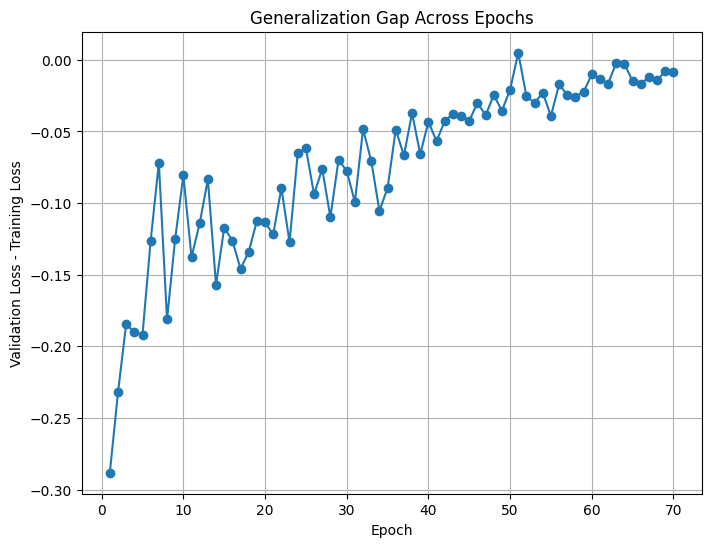

In [29]:
genError(visuals16, train_losses_cut16, val_losses_cut16)

## Results
| Model           | Val Acc | Test Acc |  
|-----------------|---------|----------|  
| Baseline        | 82.4%   | 81.8%    |  
| Cutout 8x8      | 84.0%   | 84.0%    |
| Cutout 16x16    | 81.8%   | 83.2%    |  

## Discussion
Cutout is an effective regularization method, but just as with dropout, high cutout values can negatively impact model performance.

## Conclusion
Dropout improved baseline accuracy by ~2%.